## **Data Loading**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC


In [3]:
df = pd.read_excel("C:/Users/varun/Int234/12322819ca2/WorldBank.xlsx")
df.head()


,Country Name,Country Code,Region,IncomeGroup,Year,"Birth rate, crude (per 1,000 people)","Death rate, crude (per 1,000 people)",Electric power consumption (kWh per capita),GDP (USD),GDP per capita (USD),Individuals using the Internet (% of population),"Infant mortality rate (per 1,000 live births)",Life expectancy at birth (years),Population density (people per sq. km of land area),Unemployment (% of total labor force) (modeled ILO estimate)
0,Afghanistan,AFG,South Asia,Low income,2018,NaN,NaN,NaN,1.936300e+10,520.897,NaN,47.9,NaN,56.9378,1.542
1,Afghanistan,AFG,South Asia,Low income,2017,33.211,6.575,NaN,2.019180e+10,556.302,13.50,49.5,64.130,55.5960,1.559
2,Afghanistan,AFG,South Asia,Low income,2016,33.981,6.742,NaN,1.936260e+10,547.228,11.20,51.2,63.763,54.1971,1.634
3,Afghanistan,AFG,South Asia,Low income,2015,34.809,6.929,NaN,1.990710e+10,578.466,8.26,53.1,63.377,52.7121,1.679
4,Afghanistan,AFG,South Asia,Low income,2014,35.706,7.141,NaN,2.048490e+10,613.856,7.00,55.1,62.966,51.1148,1.735


## **Data Cleaning & Preprocessing**

In [4]:
df.drop_duplicates(inplace=True)

df.fillna(df.median(numeric_only=True), inplace=True)

for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].fillna(df[col].mode()[0])


## **Target Variable Creation:**
*To transform life expectancy values into categorical classes (Low, Medium, High) for classification-based prediction.*

In [5]:
def life_category(x):
    if x < 60:
        return "Low"
    elif x < 75:
        return "Medium"
    else:
        return "High"

df['Life_Category'] = df['Life expectancy at birth (years)'].apply(life_category)


## **Life Expectancy Distribution (Histogram)**

**Objective:** *To analyze the distribution of life expectancy across countries.*

**Findings:** *The distribution showed that most countries fall into the medium life expectancy range, with fewer countries in the low and high categories.*


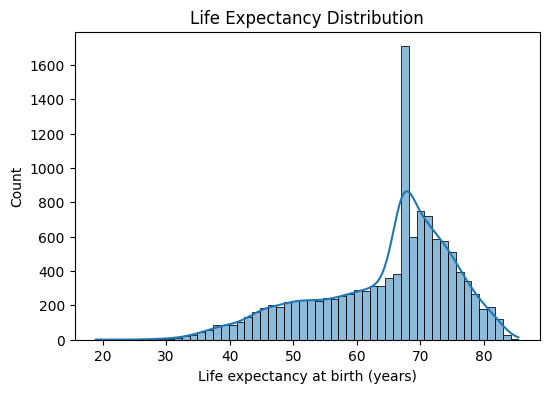

In [6]:
plt.figure(figsize=(6,4))
sns.histplot(df['Life expectancy at birth (years)'], kde=True)
plt.title("Life Expectancy Distribution")
plt.show()


## **Life Expectancy Category Count (Bar Chart)**
**Objective:**
*To visualize the number of countries in each life expectancy category.*

**Findings:**
*The medium life expectancy category had the highest count, indicating global concentration around average life expectancy levels.*

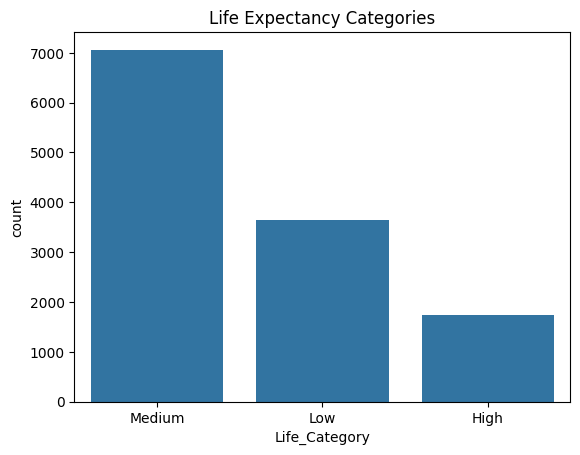

In [7]:
sns.countplot(x='Life_Category', data=df)
plt.title("Life Expectancy Categories")
plt.show()


## **Correlation Heatmap**

**Objective:** *To identify relationships between numerical features and life expectancy.*

**Findings:** *Strong correlations were observed between life expectancy and health-related indicators, confirming their influence on prediction.*


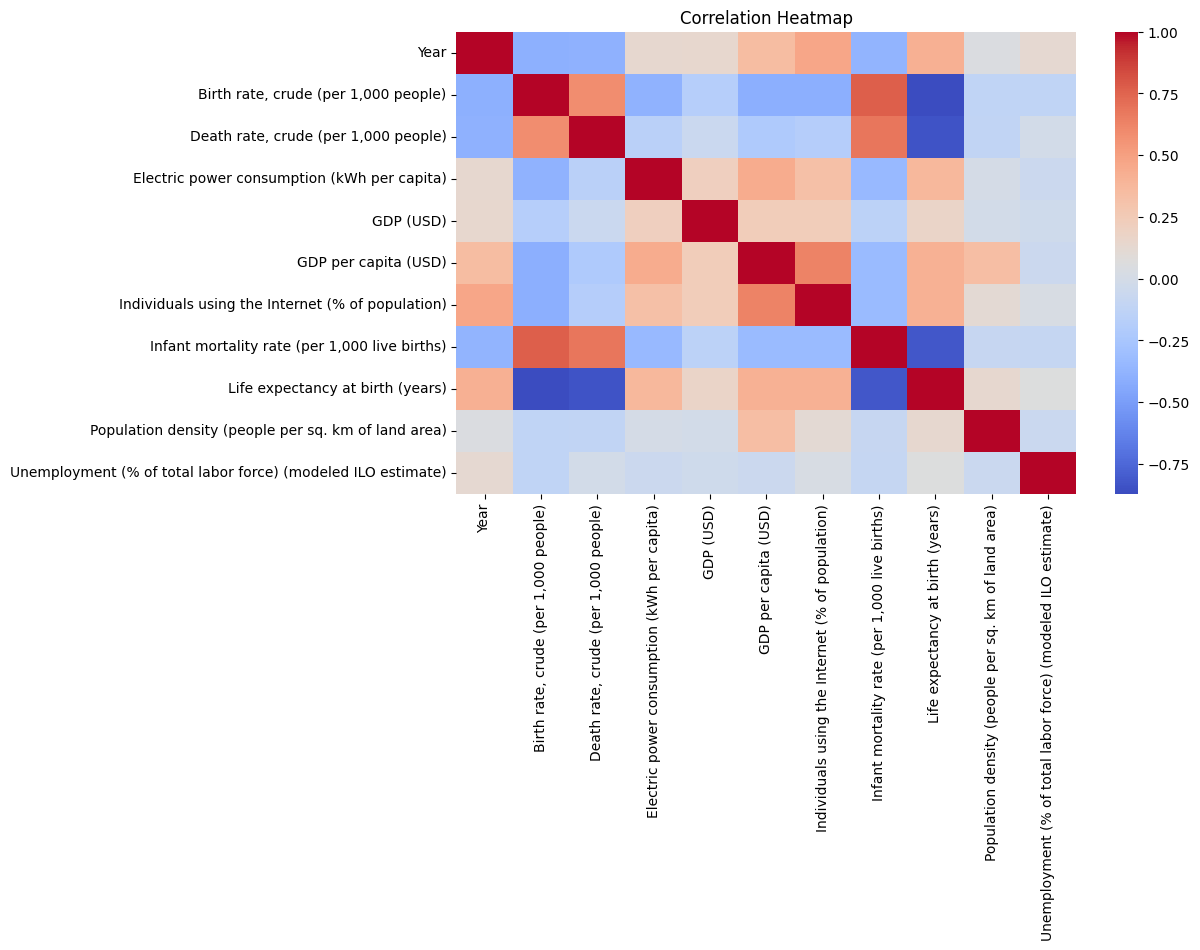

In [8]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()



## **Encoding & Feature Scaling**

**Objective:** *To convert categorical features into numerical format and normalize feature values for fair model training.*

**Findings:** *The transformation ensured that all features contributed proportionally during model training, preventing bias toward variables with larger scales.*


In [9]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

le = LabelEncoder()
df['Life_Category'] = le.fit_transform(df['Life_Category'])

for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

X = df.drop(['Life expectancy at birth (years)', 'Life_Category'], axis=1)
y = df['Life_Category']

scaler = StandardScaler()
X = scaler.fit_transform(X)


## Model Training

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [11]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "Linear SVM": SVC(kernel='linear', probability=True)
}



## Model Evaluation (Accuracy, Precision, Recall, F1)
**Objective:**
*To evaluate and compare the predictive performance of different supervised learning models.*

**Findings:**
*The Decision Tree and Linear SVM models showed higher accuracy and F1-scores compared to other models.*

In [12]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    results.append([
        name,
        accuracy_score(y_test, y_pred),
        precision_score(y_test, y_pred, average='weighted'),
        recall_score(y_test, y_pred, average='weighted'),
        f1_score(y_test, y_pred, average='weighted')
    ])


In [13]:
result_df = pd.DataFrame(
    results, 
    columns=["Model", "Accuracy", "Precision", "Recall", "F1 Score"]
)
result_df


,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.920482,0.919971,0.920482,0.919869
1,KNN,0.961044,0.961014,0.961044,0.960953
2,Naive Bayes,0.760643,0.793801,0.760643,0.759374
3,Decision Tree,0.970281,0.970284,0.970281,0.970260
4,Linear SVM,0.925703,0.925400,0.925703,0.925390


## Model Comparison Graph

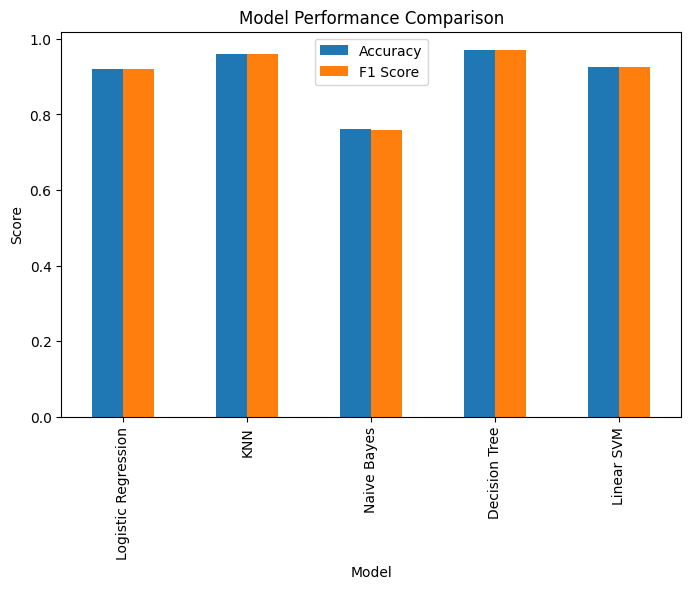

In [14]:
result_df.set_index("Model")[["Accuracy","F1 Score"]].plot(kind='bar', figsize=(8,5))
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.show()


## ROC–AUC Evaluation
**Objective:**
*To assess the classification capability of models using ROC-AUC scores.*

**Findings:**
*ROC-AUC values confirmed that the Decision Tree and Linear SVM models achieved superior class separation.*

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize

y_test_bin = label_binarize(y_test, classes=[0,1,2])

for name, model in models.items():
    model.fit(X_train, y_train)
    y_prob = model.predict_proba(X_test)
    auc = roc_auc_score(y_test_bin, y_prob, multi_class='ovr')
    print(name, "ROC-AUC:", auc)


Logistic Regression ROC-AUC: 0.9836214511004325
KNN ROC-AUC: 0.9945562586154958
Naive Bayes ROC-AUC: 0.9459254535605895
Decision Tree ROC-AUC: 0.969693323366238


## k-Fold Cross Validation
**Objective:**
*To validate model stability and generalization across different data splits.*

**Findings:**
*Cross-validation results showed consistent performance, indicating reliable and stable models.*

In [28]:
from sklearn.model_selection import cross_val_score

for name, model in models.items():
    cv_score = cross_val_score(model, X, y, cv=5).mean()
    print(name, "CV Score:", cv_score)


Logistic Regression CV Score: 0.905937353270051
KNN CV Score: 0.8336441951010147
Naive Bayes CV Score: 0.7631938118081003
Decision Tree CV Score: 0.8337206761961466
Linear SVM CV Score: 0.9056160358589844


## Best Model Prediction Visualization
**Objective:**
*To visualize the prediction output of the best-performing model.*

**Findings:**
*The predicted category distribution closely matched actual data distribution, confirming model effectiveness.*

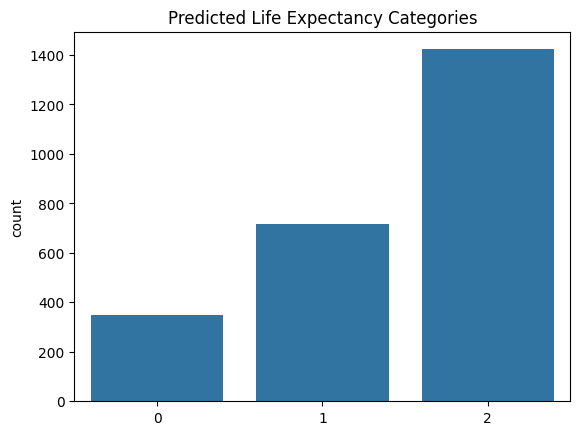

In [29]:
best_model = DecisionTreeClassifier()
best_model.fit(X_train, y_train)

y_pred_best = best_model.predict(X_test)

sns.countplot(x=y_pred_best)
plt.title("Predicted Life Expectancy Categories")
plt.show()


## Confusion Matrix
**Objective:**
*To analyze correct and incorrect predictions made by the final model.*

**Findings:**
*The confusion matrix showed high correct classification rates, with minimal misclassification between adjacent categories.*

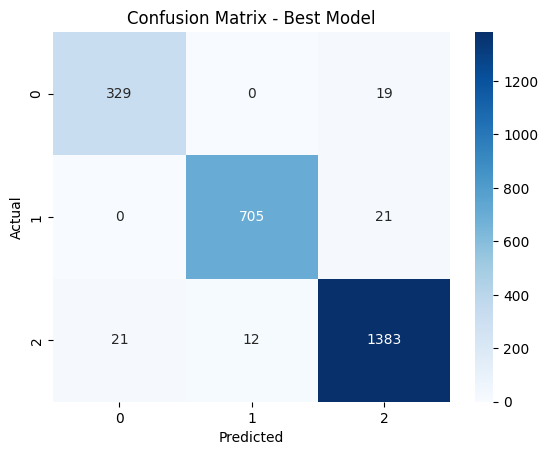

In [30]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_best)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Best Model")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


## Print Predicted Class Labels

In [37]:
print("Predicted class labels:")
print(y_pred[:10])


Predicted class labels:
[2 0 1 0 1 1 2 2 1 1]


## Readable Prediction Output
**Objective:**
*To convert numerical predictions into meaningful life expectancy category names.*

In [38]:
label_map = {0: "Low", 1: "Medium", 2: "High"}

predicted_categories = [label_map[i] for i in y_pred]

print("Predicted Life Expectancy Categories:")
print(predicted_categories[:10])


Predicted Life Expectancy Categories:
['High', 'Low', 'Medium', 'Low', 'Medium', 'Medium', 'High', 'High', 'Medium', 'Medium']


## Prediction Comparison Analysis
**Objective:**
*To compare actual life expectancy categories with predicted categories.*

**Finding:**
*The comparison showed that most predictions matched the actual categories, indicating good model accuracy.*

In [39]:
actual_categories = [label_map[i] for i in y_test[:10]]

comparison_df = pd.DataFrame({
    "Actual": actual_categories,
    "Predicted": predicted_categories[:10]
})

print(comparison_df)


   Actual Predicted
0    High      High
1    High       Low
2  Medium    Medium
3     Low       Low
4  Medium    Medium
5  Medium    Medium
6    High      High
7    High      High
8  Medium    Medium
9  Medium    Medium


## Prediction Accuracy

In [40]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Final Model Accuracy:", accuracy)


Final Model Accuracy: 0.9257028112449799
